In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,losses,metrics
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:

import tensorflow_datasets as tfds

# Load the CIFAR-10 dataset
dataset, info = tfds.load("cifar10", split="train", as_supervised=True, with_info=True)

# Split the training set into validation and training sets
validation_percentage = 10  # Percentage of data to use for validation
num_validation_samples = int(len(dataset) * (validation_percentage / 100.0))

train_set = dataset.skip(num_validation_samples)
valid_set = dataset.take(num_validation_samples)

# Load the test set
test_set = tfds.load("cifar10", split="test", as_supervised=True)

# Print the number of samples in each set
print("Train Set Size:", len(train_set))
print("Validation Set Size:", len(valid_set))
print("Test Set Size:", len(test_set))

# Extract the labels from the dataset
train_labels = [label for _, label in train_set]
valid_labels = [label for _, label in valid_set]
test_labels = [label for _, label in test_set]

# Print the number of labels in each set
print("Train Labels Size:", len(train_labels))
print("Validation Labels Size:", len(valid_labels))
print("Test Labels Size:", len(test_labels))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incomplete71ZCEX/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incomplete71ZCEX/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Train Set Size: 45000
Validation Set Size: 5000
Test Set Size: 10000
Train Labels Size: 45000
Validation Labels Size: 5000
Test Labels Size: 10000


In [3]:

train_images = [image for image,_ in train_set]
valid_images = [image for image,_ in valid_set]
test_images = [image for image,_ in test_set]



print("Train Images Size:", len(train_images))
print("Validation Images Size:", len(valid_images))
print("Test Images Size:", len(test_images))

Train Images Size: 45000
Validation Images Size: 5000
Test Images Size: 10000


In [4]:
import numpy as np
train_images=np.array(train_images
                       )
valid_images=np.array(valid_images
                       )
test_images=np.array(test_images
                       )


train_images,valid_images,test_images=train_images.astype('float32')/255.0,valid_images.astype('float32')/255.0,test_images.astype('float32')/255.0



train_labels=np.array(train_labels
                       )
valid_labels=np.array(valid_labels
                       )
test_labels=np.array(test_labels)

In [5]:

train_b1,train_b2,train_b3,train_b4,train_b5=train_images[0:9000],train_images[9000:18000],train_images[18000:27000],train_images[27000:36000],train_images[36000:]
print(train_b1.shape)
print(train_b2.shape)
print(train_b3.shape)
print(train_b4.shape)
print(train_b5.shape)

(9000, 32, 32, 3)
(9000, 32, 32, 3)
(9000, 32, 32, 3)
(9000, 32, 32, 3)
(9000, 32, 32, 3)


In [6]:

train_l1,train_l2,train_l3,train_l4,train_l5=train_labels[0:9000],train_labels[9000:18000],train_labels[18000:27000],train_labels[27000:36000],train_labels[36000:]
print(train_l1.shape)
print(train_l2.shape)
print(train_l3.shape)
print(train_l4.shape)
print(train_l5.shape)

(9000,)
(9000,)
(9000,)
(9000,)
(9000,)


In [7]:
classes1,classes2,classes3,classes4,classes5 = train_l1,train_l2,train_l3,train_l4,train_l5
numberofclasses = 10
onehotencb1 = tf.one_hot(classes1,numberofclasses)
onehotencb2 = tf.one_hot(classes2,numberofclasses)
onehotencb3 = tf.one_hot(classes3,numberofclasses)
onehotencb4 = tf.one_hot(classes4,numberofclasses)
onehotencb5 = tf.one_hot(classes5,numberofclasses)

In [8]:


from keras.engine.sequential import Sequential
final_labels_encoded=np.concatenate((onehotencb1,onehotencb2,onehotencb3,onehotencb4,onehotencb5))
valid_lfinal=tf.one_hot(valid_labels,numberofclasses)
test_labels_f=tf.one_hot(test_labels,numberofclasses)

## Hyperparameter: Optimizers

In [9]:

modelsgd=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimsgd=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
modelsgd.compile(optimizer=optimsgd, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainersgd= modelsgd.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultsgd = modelsgd.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 20s 9ms/step - loss: 1.7383 - categorical_crossentropy: 1.7383 - val_loss: 1.4725 - val_categorical_crossentropy: 1.4725
Epoch 2/100
704/704 [==============================] - 6s 8ms/step - loss: 1.3832 - categorical_crossentropy: 1.3832 - val_loss: 1.3883 - val_categorical_crossentropy: 1.3883
Epoch 3/100
704/704 [==============================] - 5s 7ms/step - loss: 1.2280 - categorical_crossentropy: 1.2280 - val_loss: 1.2386 - val_categorical_crossentropy: 1.2386
Epoch 4/100
704/704 [==============================] - 6s 8ms/step - loss: 1.1239 - categorical_crossentropy: 1.1239 - val_loss: 1.1231 - val_categorical_crossentropy: 1.1231
Epoch 5/100
704/704 [==============================] - 5s 7ms/step - loss: 1.0357 - categorical_crossentropy: 1.0357 - val_loss: 1.0411 - val_categorical_crossentropy: 1.0411
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: 0.9626 - categorical_crossentropy: 0.9626 - val_l

In [10]:

modelada=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimada=tf.keras.optimizers.Adadelta(learning_rate=0.001)
modelada.compile(optimizer=optimada, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainerada= modelada.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultada = modelada.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 8s 8ms/step - loss: 2.2662 - categorical_crossentropy: 2.2662 - val_loss: 2.2132 - val_categorical_crossentropy: 2.2132
Epoch 2/100
704/704 [==============================] - 6s 8ms/step - loss: 2.1805 - categorical_crossentropy: 2.1805 - val_loss: 2.1451 - val_categorical_crossentropy: 2.1451
Epoch 3/100
704/704 [==============================] - 6s 8ms/step - loss: 2.1177 - categorical_crossentropy: 2.1177 - val_loss: 2.0897 - val_categorical_crossentropy: 2.0897
Epoch 4/100
704/704 [==============================] - 5s 8ms/step - loss: 2.0644 - categorical_crossentropy: 2.0644 - val_loss: 2.0411 - val_categorical_crossentropy: 2.0411
Epoch 5/100
704/704 [==============================] - 5s 7ms/step - loss: 2.0184 - categorical_crossentropy: 2.0184 - val_loss: 1.9982 - val_categorical_crossentropy: 1.9982
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: 1.9769 - categorical_crossentropy: 1.9769 - val_lo

In [11]:

modeladf=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimadf=tf.keras.optimizers.Adafactor(learning_rate=0.001)
modeladf.compile(optimizer=optimadf, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
traineradf= modeladf.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultadf = modeladf.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 11s 8ms/step - loss: nan - categorical_crossentropy: nan - val_loss: nan - val_categorical_crossentropy: nan
Epoch 2/100
704/704 [==============================] - 6s 8ms/step - loss: nan - categorical_crossentropy: nan - val_loss: nan - val_categorical_crossentropy: nan
Epoch 3/100
704/704 [==============================] - 5s 8ms/step - loss: nan - categorical_crossentropy: nan - val_loss: nan - val_categorical_crossentropy: nan
Epoch 4/100
704/704 [==============================] - 5s 8ms/step - loss: nan - categorical_crossentropy: nan - val_loss: nan - val_categorical_crossentropy: nan
Epoch 5/100
704/704 [==============================] - 5s 8ms/step - loss: nan - categorical_crossentropy: nan - val_loss: nan - val_categorical_crossentropy: nan
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: nan - categorical_crossentropy: nan - val_loss: nan - val_categorical_crossentropy: nan
Epoch 7/100
704/704 [

In [12]:
modeladd=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimadd=tf.keras.optimizers.Adagrad(learning_rate=0.001)
modeladd.compile(optimizer=optimadd, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
traineradd= modeladd.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultadd = modeladd.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 8s 8ms/step - loss: 1.9243 - categorical_crossentropy: 1.9243 - val_loss: 1.8146 - val_categorical_crossentropy: 1.8146
Epoch 2/100
704/704 [==============================] - 5s 7ms/step - loss: 1.6360 - categorical_crossentropy: 1.6360 - val_loss: 1.6150 - val_categorical_crossentropy: 1.6150
Epoch 3/100
704/704 [==============================] - 5s 7ms/step - loss: 1.5292 - categorical_crossentropy: 1.5292 - val_loss: 1.5253 - val_categorical_crossentropy: 1.5253
Epoch 4/100
704/704 [==============================] - 5s 8ms/step - loss: 1.4579 - categorical_crossentropy: 1.4579 - val_loss: 1.5251 - val_categorical_crossentropy: 1.5251
Epoch 5/100
704/704 [==============================] - 5s 7ms/step - loss: 1.4037 - categorical_crossentropy: 1.4037 - val_loss: 1.4234 - val_categorical_crossentropy: 1.4234
Epoch 6/100
704/704 [==============================] - 5s 8ms/step - loss: 1.3599 - categorical_crossentropy: 1.3599 - val_lo

In [13]:

modeladm=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimadm=tf.keras.optimizers.Adam(learning_rate=0.1)
modeladm.compile(optimizer=optimadm, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
traineradm= modeladm.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultadm = modeladm.evaluate(test_images, test_labels_f, verbose=0)


Epoch 1/100
704/704 [==============================] - 9s 9ms/step - loss: 212.7890 - categorical_crossentropy: 212.7890 - val_loss: 2.3140 - val_categorical_crossentropy: 2.3140
Epoch 2/100
704/704 [==============================] - 5s 8ms/step - loss: 2.3117 - categorical_crossentropy: 2.3117 - val_loss: 2.3133 - val_categorical_crossentropy: 2.3133
Epoch 3/100
704/704 [==============================] - 6s 9ms/step - loss: 2.3108 - categorical_crossentropy: 2.3108 - val_loss: 2.3095 - val_categorical_crossentropy: 2.3095
Epoch 4/100
704/704 [==============================] - 5s 7ms/step - loss: 2.3115 - categorical_crossentropy: 2.3115 - val_loss: 2.3113 - val_categorical_crossentropy: 2.3113
Epoch 5/100
704/704 [==============================] - 5s 8ms/step - loss: 2.3121 - categorical_crossentropy: 2.3121 - val_loss: 2.3156 - val_categorical_crossentropy: 2.3156
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: 2.3133 - categorical_crossentropy: 2.3133 - va

In [14]:

modeladmideal=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimadmideal=tf.keras.optimizers.Adam(learning_rate=3e-4)
modeladmideal.compile(optimizer=optimadmideal, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
traineradmideal= modeladmideal.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultadmideal= modeladmideal.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 8s 8ms/step - loss: 1.4975 - categorical_crossentropy: 1.4975 - val_loss: 1.3232 - val_categorical_crossentropy: 1.3232
Epoch 2/100
704/704 [==============================] - 5s 8ms/step - loss: 1.1014 - categorical_crossentropy: 1.1014 - val_loss: 1.0659 - val_categorical_crossentropy: 1.0659
Epoch 3/100
704/704 [==============================] - 5s 7ms/step - loss: 0.9412 - categorical_crossentropy: 0.9412 - val_loss: 0.9478 - val_categorical_crossentropy: 0.9478
Epoch 4/100
704/704 [==============================] - 5s 8ms/step - loss: 0.8187 - categorical_crossentropy: 0.8187 - val_loss: 0.9095 - val_categorical_crossentropy: 0.9095
Epoch 5/100
704/704 [==============================] - 5s 7ms/step - loss: 0.7286 - categorical_crossentropy: 0.7286 - val_loss: 0.9146 - val_categorical_crossentropy: 0.9146
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: 0.6487 - categorical_crossentropy: 0.6487 - val_lo

In [15]:

modeladw=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimadw=tf.keras.optimizers.AdamW(learning_rate=0.001)
modeladw.compile(optimizer=optimadw, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
traineradw= modeladw.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultadw = modeladw.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 9s 8ms/step - loss: 1.4344 - categorical_crossentropy: 1.4344 - val_loss: 1.0899 - val_categorical_crossentropy: 1.0899
Epoch 2/100
704/704 [==============================] - 6s 8ms/step - loss: 0.9617 - categorical_crossentropy: 0.9617 - val_loss: 0.9347 - val_categorical_crossentropy: 0.9347
Epoch 3/100
704/704 [==============================] - 6s 8ms/step - loss: 0.7768 - categorical_crossentropy: 0.7768 - val_loss: 0.8638 - val_categorical_crossentropy: 0.8638
Epoch 4/100
704/704 [==============================] - 5s 8ms/step - loss: 0.6477 - categorical_crossentropy: 0.6477 - val_loss: 0.7956 - val_categorical_crossentropy: 0.7956
Epoch 5/100
704/704 [==============================] - 6s 8ms/step - loss: 0.5411 - categorical_crossentropy: 0.5411 - val_loss: 0.8119 - val_categorical_crossentropy: 0.8119
Epoch 6/100
704/704 [==============================] - 5s 8ms/step - loss: 0.4391 - categorical_crossentropy: 0.4391 - val_lo

In [16]:

modeladx=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimadx=tf.keras.optimizers.Adamax(learning_rate=0.001)
modeladx.compile(optimizer=optimadx, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
traineradx= modeladx.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultadx = modeladx.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 8s 8ms/step - loss: 1.4455 - categorical_crossentropy: 1.4455 - val_loss: 1.1839 - val_categorical_crossentropy: 1.1839
Epoch 2/100
704/704 [==============================] - 5s 8ms/step - loss: 1.0710 - categorical_crossentropy: 1.0710 - val_loss: 1.0300 - val_categorical_crossentropy: 1.0300
Epoch 3/100
704/704 [==============================] - 5s 7ms/step - loss: 0.9168 - categorical_crossentropy: 0.9168 - val_loss: 0.9288 - val_categorical_crossentropy: 0.9288
Epoch 4/100
704/704 [==============================] - 5s 8ms/step - loss: 0.7945 - categorical_crossentropy: 0.7945 - val_loss: 0.9062 - val_categorical_crossentropy: 0.9062
Epoch 5/100
704/704 [==============================] - 5s 8ms/step - loss: 0.7026 - categorical_crossentropy: 0.7026 - val_loss: 0.8328 - val_categorical_crossentropy: 0.8328
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: 0.6173 - categorical_crossentropy: 0.6173 - val_lo

In [17]:

modelftrl=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimftrl=tf.keras.optimizers.Ftrl(learning_rate=0.001)
modelftrl.compile(optimizer=optimftrl, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainerftrl= modelftrl.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultftrl = modelftrl.evaluate(test_images, test_labels_f, verbose=0)


Epoch 1/100
704/704 [==============================] - 8s 8ms/step - loss: 2.3030 - categorical_crossentropy: 2.3030 - val_loss: 2.3026 - val_categorical_crossentropy: 2.3026
Epoch 2/100
704/704 [==============================] - 5s 8ms/step - loss: 2.3026 - categorical_crossentropy: 2.3026 - val_loss: 2.3026 - val_categorical_crossentropy: 2.3026
Epoch 3/100
704/704 [==============================] - 5s 7ms/step - loss: 2.3026 - categorical_crossentropy: 2.3026 - val_loss: 2.3026 - val_categorical_crossentropy: 2.3026
Epoch 4/100
704/704 [==============================] - 6s 8ms/step - loss: 2.3026 - categorical_crossentropy: 2.3026 - val_loss: 2.3026 - val_categorical_crossentropy: 2.3026
Epoch 5/100
704/704 [==============================] - 5s 7ms/step - loss: 2.3026 - categorical_crossentropy: 2.3026 - val_loss: 2.3026 - val_categorical_crossentropy: 2.3026
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: 2.3026 - categorical_crossentropy: 2.3026 - val_lo

In [18]:



modelrms=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimrms=tf.keras.optimizers.RMSprop(learning_rate=0.001,momentum=0.9)
modelrms.compile(optimizer=optimrms, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainerrms= modelrms.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultrms = modelrms.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 8s 8ms/step - loss: 1.7200 - categorical_crossentropy: 1.7200 - val_loss: 1.5045 - val_categorical_crossentropy: 1.5045
Epoch 2/100
704/704 [==============================] - 5s 8ms/step - loss: 1.3977 - categorical_crossentropy: 1.3977 - val_loss: 1.3667 - val_categorical_crossentropy: 1.3667
Epoch 3/100
704/704 [==============================] - 5s 7ms/step - loss: 1.3102 - categorical_crossentropy: 1.3102 - val_loss: 1.3638 - val_categorical_crossentropy: 1.3638
Epoch 4/100
704/704 [==============================] - 5s 7ms/step - loss: 1.2728 - categorical_crossentropy: 1.2728 - val_loss: 1.2891 - val_categorical_crossentropy: 1.2891
Epoch 5/100
704/704 [==============================] - 5s 8ms/step - loss: 1.2388 - categorical_crossentropy: 1.2388 - val_loss: 1.3537 - val_categorical_crossentropy: 1.3537
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: 1.2168 - categorical_crossentropy: 1.2168 - val_lo

In [19]:

modelndm=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimndm=tf.keras.optimizers.Nadam(learning_rate=0.001)
modelndm.compile(optimizer=optimndm, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainerndm= modelndm.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultndm = modelndm.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 11s 10ms/step - loss: 1.3124 - categorical_crossentropy: 1.3124 - val_loss: 1.6554 - val_categorical_crossentropy: 1.6554
Epoch 2/100
704/704 [==============================] - 7s 10ms/step - loss: 0.8865 - categorical_crossentropy: 0.8865 - val_loss: 0.9217 - val_categorical_crossentropy: 0.9217
Epoch 3/100
704/704 [==============================] - 6s 9ms/step - loss: 0.7025 - categorical_crossentropy: 0.7025 - val_loss: 0.7947 - val_categorical_crossentropy: 0.7947
Epoch 4/100
704/704 [==============================] - 7s 10ms/step - loss: 0.5680 - categorical_crossentropy: 0.5680 - val_loss: 0.7933 - val_categorical_crossentropy: 0.7933
Epoch 5/100
704/704 [==============================] - 6s 9ms/step - loss: 0.4574 - categorical_crossentropy: 0.4574 - val_loss: 0.7874 - val_categorical_crossentropy: 0.7874
Epoch 6/100
704/704 [==============================] - 6s 9ms/step - loss: 0.3599 - categorical_crossentropy: 0.3599 - va

In [27]:
def plotteropt(trainerid,resultid):
  xaxis=np.arange(1,101)
  fig,ax=plt.subplots(1,1,figsize=(12,4))
  ax.set_title('Cross Entropy Loss')
  ax.plot(xaxis,trainerid.history['loss'], color='blue', label='train')
  ax.plot(xaxis,trainerid.history['val_loss'], color='orange', label='validation')
  ax.axhline(y=0.278, color='green', linestyle='-')
  ax.legend()
  plt.show()
  print(f"Final model performance- Categorical Cross Entropy Loss on test dataset= {resultid:.3f}")
  print("\n")

SGD


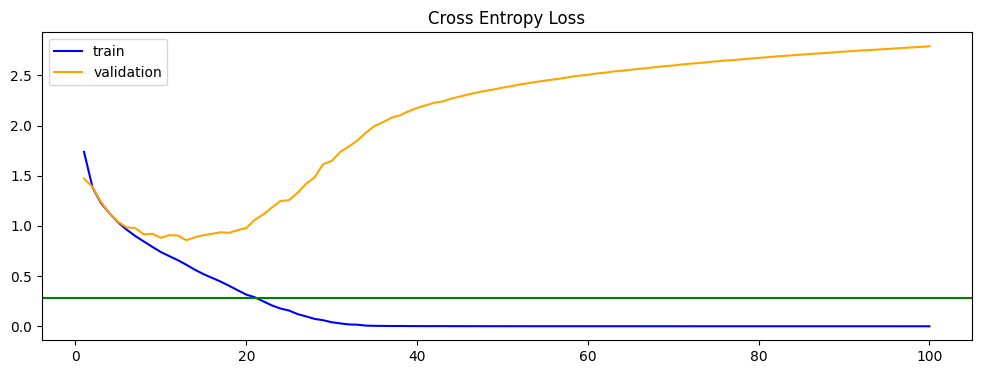

Final model performance- Categorical Cross Entropy Loss on test dataset= 2.903


Adam- with high learning rate (0.1)


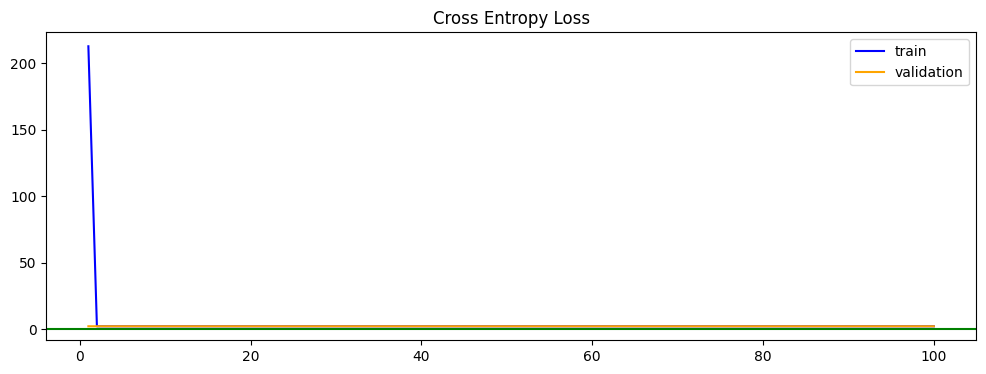

Final model performance- Categorical Cross Entropy Loss on test dataset= 2.308


Adam- with lower initial learning rate (3e-4)


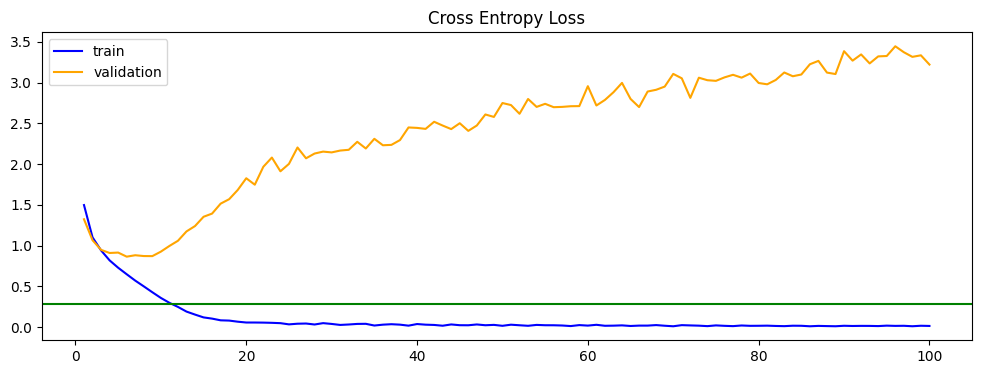

Final model performance- Categorical Cross Entropy Loss on test dataset= 3.302


Adamax


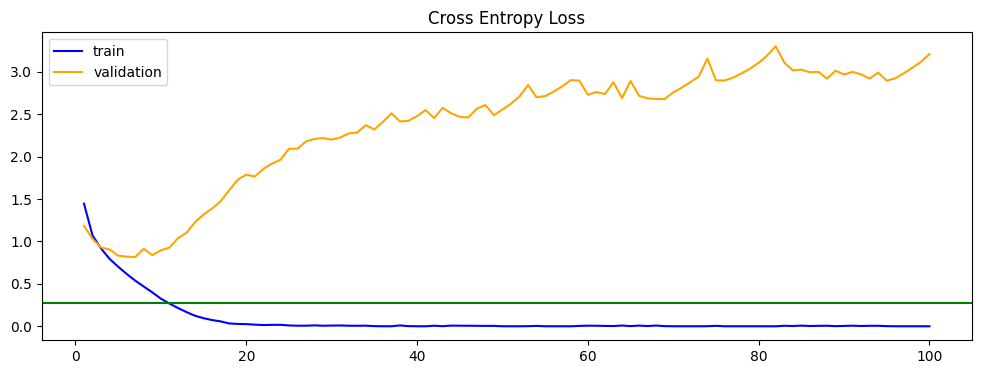

Final model performance- Categorical Cross Entropy Loss on test dataset= 3.388


AdamW


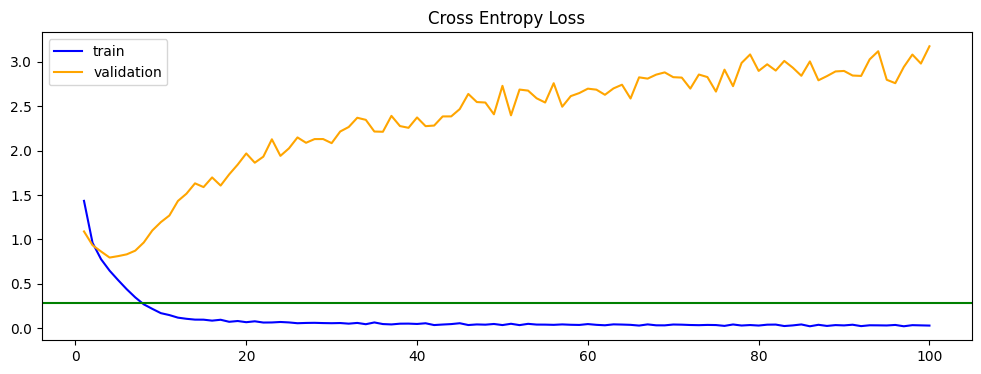

Final model performance- Categorical Cross Entropy Loss on test dataset= 3.373


Adagrad


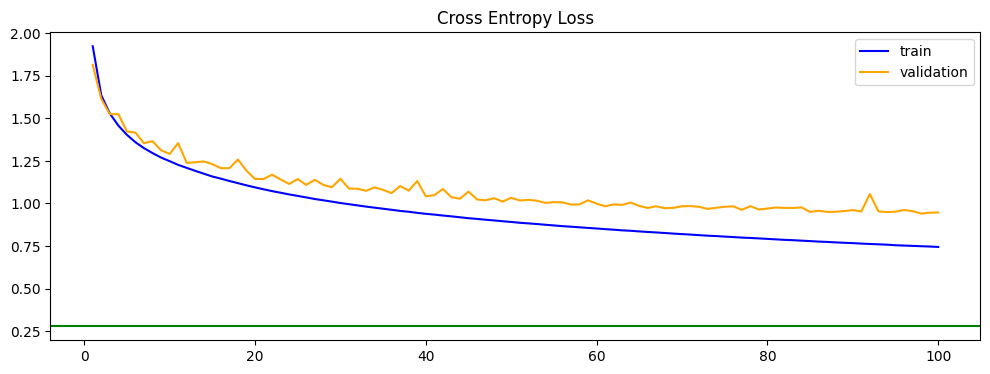

Final model performance- Categorical Cross Entropy Loss on test dataset= 0.963


Adadelta


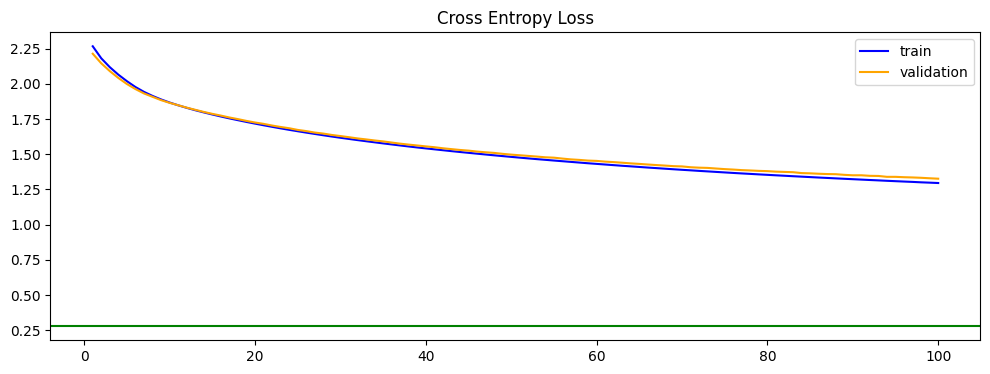

Final model performance- Categorical Cross Entropy Loss on test dataset= 1.320


Adafactor


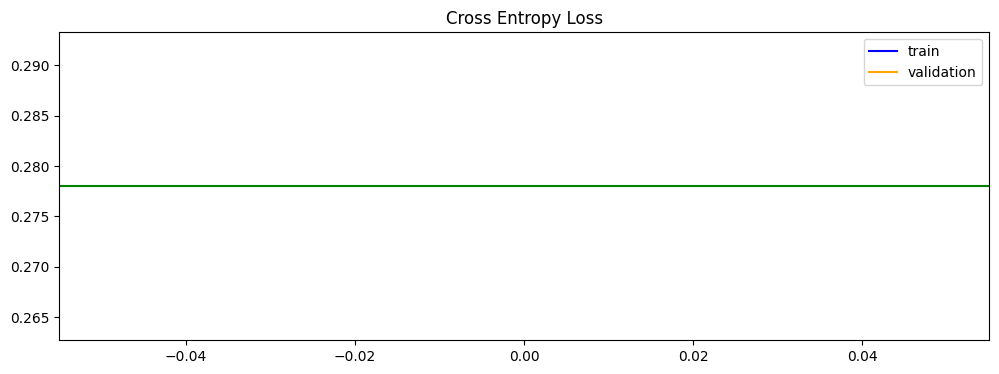

Final model performance- Categorical Cross Entropy Loss on test dataset= nan


Ftrl


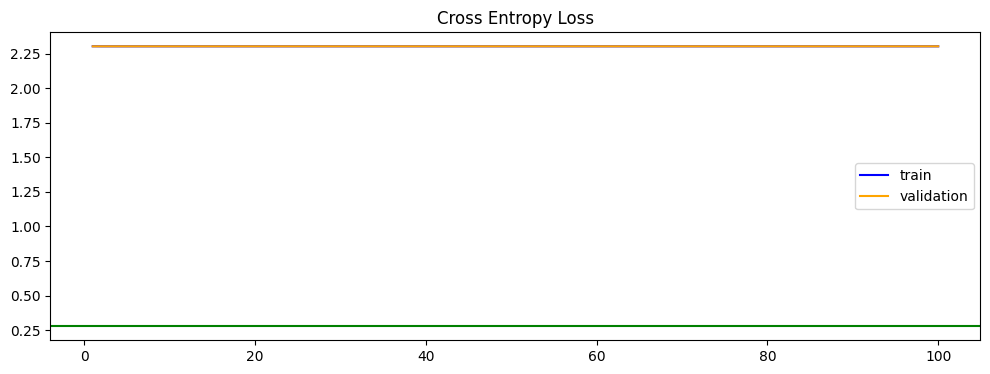

Final model performance- Categorical Cross Entropy Loss on test dataset= 2.303


Nadam


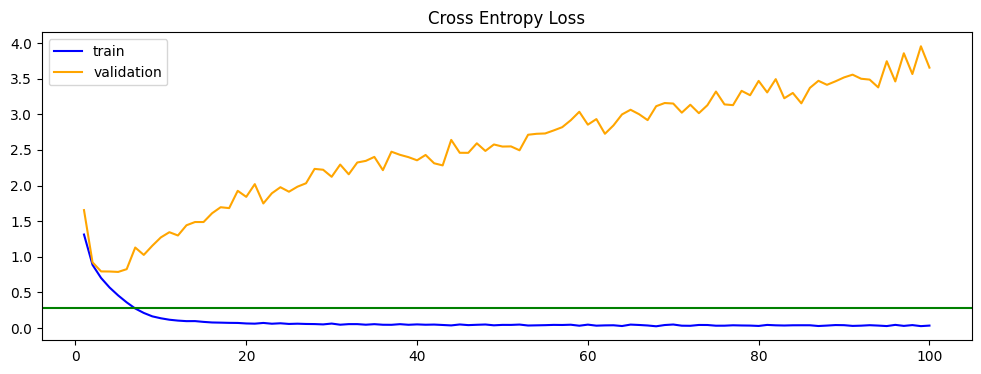

Final model performance- Categorical Cross Entropy Loss on test dataset= 3.609


RMSprop


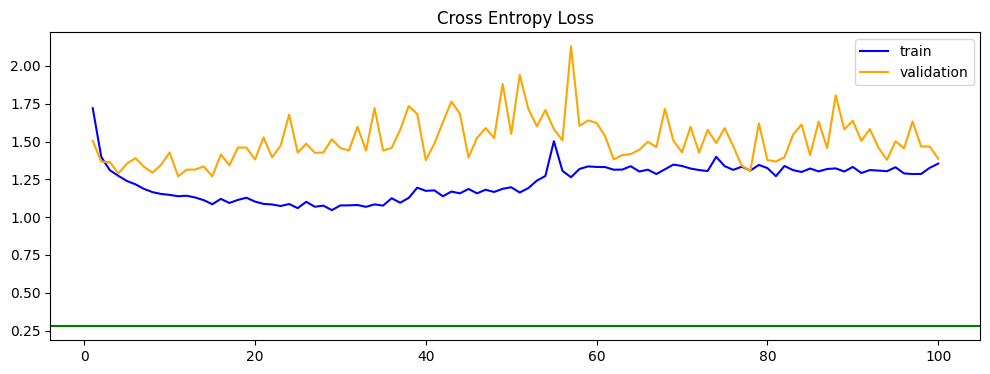

Final model performance- Categorical Cross Entropy Loss on test dataset= 1.387




In [28]:
print("SGD")
plotteropt(trainersgd,resultsgd)
print("Adam- with high learning rate (0.1)")
plotteropt(traineradm,resultadm)
print("Adam- with lower initial learning rate (3e-4)")
plotteropt(traineradmideal,resultadmideal)
print("Adamax")
plotteropt(traineradx,resultadx)
print("AdamW")
plotteropt(traineradw,resultadw)
print("Adagrad")
plotteropt(traineradd,resultadd)
print("Adadelta")
plotteropt(trainerada,resultada)
print("Adafactor")
plotteropt(traineradf,resultadf)
print("Ftrl")
plotteropt(trainerftrl,resultftrl)
print("Nadam")
plotteropt(trainerndm,resultndm)
print("RMSprop")
plotteropt(trainerrms,resultrms)